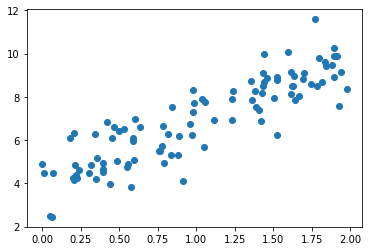

In [1]:
# Generating Linear data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.scatter(X,y)
plt.show()

In [2]:
# using the normal function lets compute Theta
X_b = np.c_[np.ones((100,1)), X] # add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.98940907]
 [2.87088394]]


We wanted this to equal 4 and 3, but the noise generated by the random function made this impossible to recover. This will do. Now lets make a prediction.

In [3]:
X_new = np.array([[0], [2]])
X_new_b= np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)


[[3.98940907]
 [9.73117694]]


This makes sense to do the dot product because we added the one case so y = theta(X) + 1. Then we do the dot product with the theta values y = (4.05...)X + 2.899...

Now lets plot the models prediction

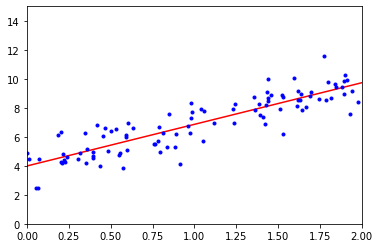

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

Now lets perform linear regression through Sklearns module

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[3.98940907] [[2.87088394]]


array([[3.98940907],
       [9.73117694]])

In [6]:
# The linear regression class lives on scipy.linalg.lstsq(), which you could call directly
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[3.98940907]
 [2.87088394]]


# Gradient Descent
A generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea is to tweak parameters iteratively in order to minimize the cost function... almost like Online Learning

Here is an example of of implementing a gradient descent algorithm with a learning rate n

In [7]:
eta = .1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta* gradients
print(theta)

[[3.98940907]
 [2.87088394]]


# Stochastic Gradient Descent
**_Batch descent_** takes the entire data set and finds the cost function. **_Stochastic_** is the other extreme that takes one random instance of the training data at a time and moves the cost function to its optimal place.

A problem with this approach is that it will bounce around even after it has found its "most optimal solution. To fix this you can implement a learning schedule that has a high learning rate so the descent can escape local minima, then slowes the learning rate down once it is close to its optimal solution

In [9]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
theta = np.random.randn(2,1) # random initialization
def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range (m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print (theta)

[[3.96659171]
 [2.92242174]]


# Stochastic Gradient descent in SKlearn

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty = None, eta0=.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01997864]), array([2.92485634]))

# Polynomial Regression

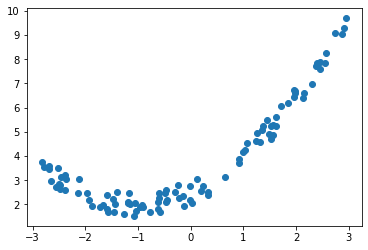

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = .5 * X**2 + X + 2 + np.random.rand(m,1)
plt.scatter(X,y)
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.24056065]
[0.24056065 0.05786942]


In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.50418826] [[1.00748971 0.4801433 ]]


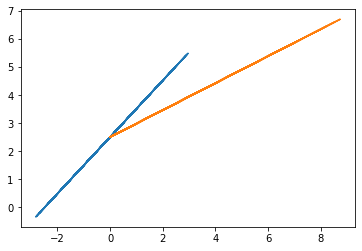